In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load data as dataframes

In [ ]:
xls = pd.ExcelFile('/content/drive/MyDrive/word co-occurrence/topic-collocates.xlsx')
# xls = pd.ExcelFile('./topic-collocates.xlsx')

# Include column names in the Excel file to facilitate data manipulation
names = ['count', 'word', 'percent']

# Add more ingredients in the list if you have more sheets in the file
ingredients = ['lettuce', 'cucumber', 'butter']

dfs = {}

for ind in ingredients:
  df = pd.read_excel(xls, ind, header=None, names=names)
  # pre-process text string, as there is a blank before each word in the original file
  df['word'] = df['word'].str.strip()
  dfs[ind] = df

In [ ]:
dfs['butter'].head()

,count,word,percent
0,29228,recipe,100
1,23739,sugar,81
2,20510,bake,70
3,18003,cook,62
4,17829,flour,61


## 2. Choose two words of interest

In [ ]:
w1, w2 = 'salad', 'recipe'

## 3. Get co-occurrence between each chose word and an ingredient

In [ ]:
cooccurrences = []
# go through each ingredient to get their co-occurrences with each chose word
for ind in ingredients:
  df = dfs[ind]
  x, y = 0, 0

  # get co-occurrence with the first word
  if w1 in df['word'].values:
    x = df.loc[df['word']==w1, 'percent'].values[0]

  # get co-occurrence with the second word
  if w2 in df['word'].values:
    y = df.loc[df['word']==w2, 'percent'].values[0]

  cooccurrences.append((ind, x, y))

In [ ]:
# Check the result
cooccurrences

[('lettuce', 100, 51), ('cucumber', 88, 79), ('butter', 0, 100)]

## 4. Plot the co-occurrences

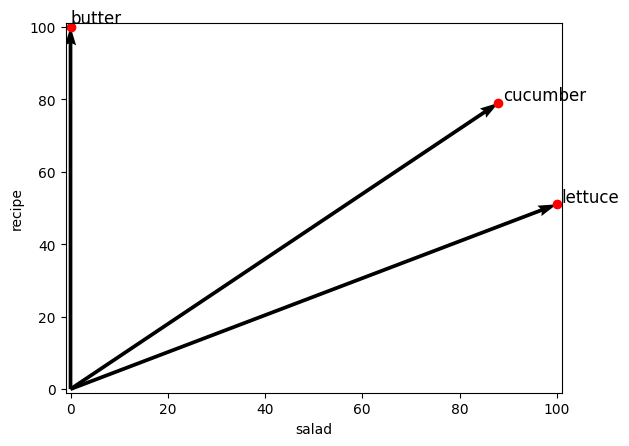

In [ ]:
# plot each point
for c in cooccurrences:
    ingredient, x, y = c
    plt.plot(x, y , 'ro')
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1)
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , ingredient, fontsize=12)

# set axis labels and limits
plt.xlabel(w1)
plt.ylabel(w2)
plt.xlim((-1, 101))
plt.ylim((-1, 101))
plt.show()

## 5. Put together as a function

In [ ]:
def plot_cooccurrences(words):
  w1, w2 = words[0], words[1]
  cooccurrences = []
  for ind in ingredients:
    df = dfs[ind]
    x, y = 0, 0
    if w1 in df['word'].values:
      x = df.loc[df['word']==w1, 'percent'].values[0]

    if w2 in df['word'].values:
      y = df.loc[df['word']==w2, 'percent'].values[0]

    cooccurrences.append((ind, x, y))

  for c in cooccurrences:
      ingredient, x, y = c
      plt.plot(x, y , 'ro')
      plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1)
      plt.text(x * (1 + 0.01), y * (1 + 0.01) , ingredient, fontsize=12)

  plt.xlabel(w1)
  plt.ylabel(w2)
  plt.xlim((-1, 101))
  plt.ylim((-1, 101))
  plt.show()

Please enter two words of interest:
salad
Your word 1: salad
recipe
Your word 2: recipe


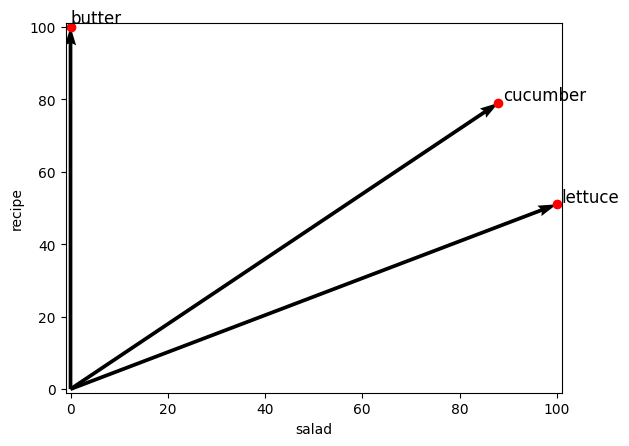

In [ ]:
words = []
print('Please enter two words of interest:')
for i in range(2):
    val = input()
    print('Your word %d: %s' %(i+1, val))
    words.append(val)
plot_cooccurrences(words)